In [1]:
# Step 1: Install required libraries
!pip install spacy sentence-transformers PyPDF2 matplotlib



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 9.8 MB/s eta 0:00:00


In [2]:
# Step 2: Import libraries
from google.colab import files
import PyPDF2
import re
import matplotlib.pyplot as plt



In [10]:
# Step 3: Upload multiple resumes
from google.colab import files
print("Upload your resumes (PDFs):")
uploaded_resumes = files.upload()

Upload your resumes (PDFs):


Saving Shadab Ansari_Sr Structural Engineer_Resume .pdf to Shadab Ansari_Sr Structural Engineer_Resume .pdf


In [11]:
import PyPDF2

# Step 4: Function to extract text from PDF
def extract_text_from_pdf(file_path):
    text = ""
    with open(file_path, "rb") as f:
        reader = PyPDF2.PdfReader(f)
        for page in reader.pages:
            text += page.extract_text() + "\n"
    return text

# Extract text from all uploaded resumes
resumes = {}
for filename in uploaded_resumes.keys():
    resumes[filename] = extract_text_from_pdf(filename)

In [12]:
!pip install PyPDF2

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import spacy

# Load a pre-trained English language model for spaCy
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Predefined list of technical skills (can be expanded)
technical_skills_list = set([
    "Python", "Machine Learning", "NLP", "SQL", "Deep Learning",
    "Java", "C++", "JavaScript", "HTML", "CSS", "React", "Angular",
    "Docker", "Kubernetes", "AWS", "Azure", "GCP", "TensorFlow",
    "PyTorch", "Scikit-learn", "Pandas", "NumPy", "Git", "Agile",
    "Core Java", "Advanced Java", "My SQL", "Java Collection", "Web Technologies",
    "VCS", "MS Office"
])


def calculate_similarity(text1, text2):
    """Calculates cosine similarity between two text documents using TF-IDF."""
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([text1, text2])
    return cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:])[0][0] * 100

def match_skills(resume_text, job_description):
    """Calculates skill match score based on predefined skills list."""
    # Use the predefined technical_skills_list or extract skills from job description
    # For this example, let's use the predefined list

    resume_skills = set([skill for skill in technical_skills_list if skill.lower() in resume_text.lower()])
    jd_skills = set([skill for skill in technical_skills_list if skill.lower() in job_description.lower()])

    if len(jd_skills) == 0:
        return 0.0  # Avoid division by zero if no skills in job description

    matched_skills = resume_skills.intersection(jd_skills)
    score = (len(matched_skills) / len(jd_skills)) * 100
    return score

# The rest of the code in the original cell g-7B8eU1KlX- was related to skill matching
# and TF-IDF calculation which are now handled by the functions above and will be used in cell 8ih_KCBd9t2U.
# Removing the redundant code from here.

In [14]:
# Step 5: Upload Job Description file (PDF or TXT)
print("Upload Job Description file (PDF or TXT):")
jd_file = files.upload()

if not jd_file:
    print("No file uploaded.")
else:
    jd_filename = list(jd_file.keys())[0]
    print(f"\nProcessing file: {jd_filename}")

    # Check file extension
    if jd_filename.lower().endswith('.pdf'):
        try:
            job_description = extract_text_from_pdf(jd_filename)
            print("\nJob Description Extracted (first 300 chars):\n", job_description[:300], "...")
        except Exception as e:
            print(f"⚠️ Failed to extract text from PDF: {e}")
            job_description = "" # Ensure job_description is defined even on error
    elif jd_filename.lower().endswith('.txt'):
        try:
            # Assuming the uploaded content is bytes, decode it
            job_description = jd_file[jd_filename].decode('utf-8')
            print("\nJob Description Extracted (first 300 chars):\n", job_description[:300], "...")
        except Exception as e:
            print(f"⚠️ Failed to read text file: {e}")
            job_description = "" # Ensure job_description is defined even on error
    else:
        print("⚠️ Uploaded file is not a PDF or TXT. Please upload a .pdf or .txt file.")
        job_description = "" # Ensure job_description is defined even on error

# You can check if job_description is empty before proceeding with matching
if not job_description:
    print("\nJob description could not be processed. Please upload a valid PDF or TXT file.")

Upload Job Description file (PDF or TXT):


Saving Shadab Ansari_Sr Structural Engineer_Resume .pdf to Shadab Ansari_Sr Structural Engineer_Resume  (1).pdf

Processing file: Shadab Ansari_Sr Structural Engineer_Resume  (1).pdf

Job Description Extracted (first 300 chars):
 Shadab Ansari 
SR. STRUCTURAL ENGINEER 
shadabansari349@gmail.com 
9167591448 
MUMBAI, India 
linkedin.com/in/shadab-ansari-90bb20166 
More than ﬁve years of experience in the shipbuilding industry. Involved in 3D modelling, Detail Design Output Drawings, 3D laser scanning. 
EXPERIENCED AND RESULTS- ...


In [15]:
# Step 6: Function to extract skills
def skill_match_score(resume_text, required_skills):
    resume_text_lower = resume_text.lower()
    matched = [skill for skill in required_skills if skill.lower() in resume_text_lower]
    score = (len(matched) / len(required_skills)) * 100
    return score, matched

# Example usage:
# required_skills = ["Python", "Machine Learning", "NLP", "SQL", "Deep Learning"]

# for resume_text in resume_texts:  # assuming you already extracted resume_texts
#     score, matched = skill_match_score(resume_text, required_skills)
#     print(f"Score: {score:.2f}% | Skills Matched: {matched}")

In [16]:
# Step 7: Compute match scores

import spacy

# Load a pre-trained English language model for spaCy
try:
    nlp = spacy.load("en_core_web_sm")
except OSError:
    print("Downloading spaCy model 'en_core_web_sm'...")
    from spacy.cli import download
    download("en_core_web_sm")
    nlp = spacy.load("en_core_web_sm")

# Predefined list of technical skills (can be expanded)
technical_skills_list = set([
    "Python", "Machine Learning", "NLP", "SQL", "Deep Learning",
    "Java", "C++", "JavaScript", "HTML", "CSS", "React", "Angular",
    "Docker", "Kubernetes", "AWS", "Azure", "GCP", "TensorFlow",
    "PyTorch", "Scikit-learn", "Pandas", "NumPy", "Git", "Agile",
    "Core Java", "Advanced Java", "My SQL", "Java Collection", "Web Technologies",
    "VCS", "MS Office"
])

def extract_skills(text):
    doc = nlp(text.lower())
    extracted = set()
    # Check for skills in the predefined list
    for skill in technical_skills_list:
        if skill.lower() in doc.text:
            extracted.add(skill)
    # You could add NER based skill extraction here if relevant labels exist and are reliable
    return extracted


jd_skills = extract_skills(job_description)
scores = {}
for name, text in resumes.items():
    resume_skills = extract_skills(text)
    # Add a check for len(jd_skills) to prevent ZeroDivisionError
    if len(jd_skills) > 0:
        score = len(resume_skills & jd_skills) / len(jd_skills) * 100
    else:
        score = 0  # Set score to 0 if no skills are found in job description
    scores[name] = score

print("Job Description Skills:", jd_skills)
print("\nResume Skills Match Scores:")
for name, score in scores.items():
    print(f"{name}: {score:.2f}%")

Job Description Skills: set()

Resume Skills Match Scores:
Shadab Ansari_Sr Structural Engineer_Resume .pdf: 0.00%



--- Resume Rankings ---
1. Resume: Shadab Ansari_Sr Structural Engineer_Resume .pdf
   Similarity Score: 100.00%
   Skill Match Score: 0.00%
   Final Weighted Score: 30.00%



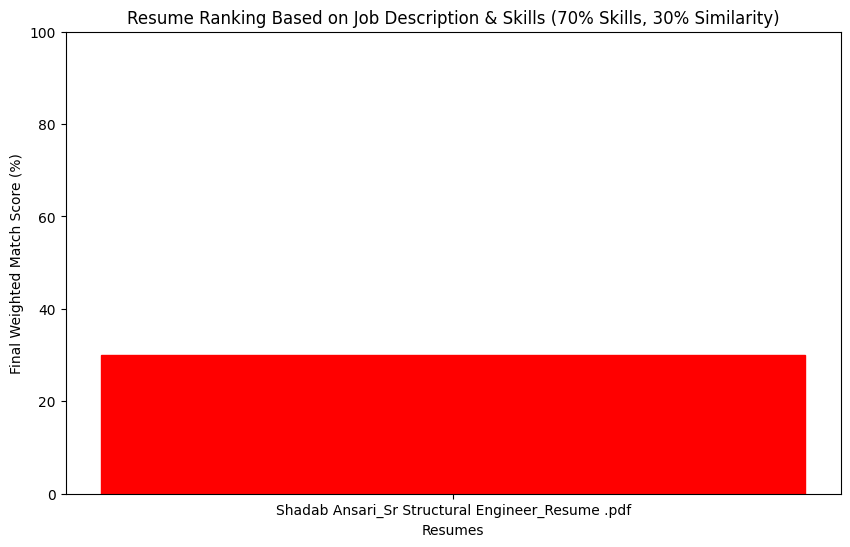

In [17]:
# --- Step 8: Rank Resumes with Weighted Scoring ---
results = []

# Ensure job_description is defined before use
if 'job_description' not in locals() or not job_description:
    print("Job description is not available. Please upload and process the job description first.")
else:
    for fname, text in resumes.items():   # <-- using 'resumes' dict now
        sim = calculate_similarity(text, job_description)
        skill_score = match_skills(text, job_description)

        # Weighted final score: 70% skill, 30% similarity
        final_score = 0.3 * sim + 0.7 * skill_score

        results.append({
            "resume": fname,
            "similarity": sim,
            "skill": skill_score,
            "final_score": final_score
        })

    # Sort resumes by weighted final score
    results_sorted = sorted(results, key=lambda x: x['final_score'], reverse=True)

    print("\n--- Resume Rankings ---")
    for i, r in enumerate(results_sorted, 1):
        print(f"{i}. Resume: {r['resume']}")
        print(f"   Similarity Score: {r['similarity']:.2f}%")
        print(f"   Skill Match Score: {r['skill']:.2f}%")
        print(f"   Final Weighted Score: {r['final_score']:.2f}%\n")


    # --- Step 9: Visualization with Traffic-Light Coloring ---
    import matplotlib.pyplot as plt

    resumes_list = [r['resume'] for r in results_sorted]
    scores = [r['final_score'] for r in results_sorted]

    plt.figure(figsize=(10, 6))
    bars = plt.bar(resumes_list, scores)

    # Apply traffic-light coloring based on weighted final score
    for bar, score in zip(bars, scores):
        if score >= 60:
            bar.set_color('green')
        elif score >= 40:
            bar.set_color('orange')
        else:
            bar.set_color('red')

    plt.xlabel("Resumes")
    plt.ylabel("Final Weighted Match Score (%)")
    plt.title("Resume Ranking Based on Job Description & Skills (70% Skills, 30% Similarity)")
    plt.ylim(0, 100)
    plt.show()

In [ ]:
# Step 10: Download notebook itself (optional)
from google.colab import files

# To download the notebook, you need to save it first using File > Save or File > Save and Pin Revision
# Then you can use the files.download() function with the correct filename.
# Example: files.download("Your_Notebook_Name.ipynb")

print("To download the notebook, please save it first (File > Save) and then use files.download('Your_Notebook_Name.ipynb')")

To download the notebook, please save it first (File > Save) and then use files.download('Your_Notebook_Name.ipynb')
